In [1]:
!pip install plot_keras_history
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from plot_keras_history import show_history

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.5/322.5 kB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for plot_keras_history: filename=plot_keras_history-1.1.38-py3-none-any.whl size=9456 sha256=7f201e2608b79526df1f0e8930cb6ae7fb6c84bfbac8f74b44dabe44ec4c64e3
  Stored in directory: /root/.cache/pip/wheels/2f/31/6c/bbc9703b7baa8bd3802a8aedd9e2f9e66941b0cf0d456ab4cc
  Created wheel for sanitize_ml_labels: filename=sanitize_ml_labels-1.0.51-py3-none-any.whl size=321866 sha256=b485667699c211519af5863e9c788f5ec98601609c3ba6f1c3618aa3f2d2cd07
  Stored in directory: /root/.cache/pip/wheels/30/9f/f5/37d037c39ac8b305590d5956f7021c6ca94b63c68be24f6841
  Created wheel for support_developer: filename=support_developer-1.0.5-py3-none-any.whl size=5630 sha256=d451f45b4da75aa37f891c7c48bf9f2ad600cbae02b939f687d720a84b4136b0
  Stored in directo

In [2]:
(X_train, Y_train), (X_test, Y_test) = keras.datasets.mnist.load_data()
num_classes = 10
x_train = X_train.reshape(60000, 784)
x_test = X_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape, 'train input samples')
print(x_test.shape, 'test input samples')

11490434/11490434 [==============================] - 0s 0us/step
(60000, 784) train input samples
(10000, 784) test input samples


In [3]:
y_train = keras.utils.to_categorical(Y_train, num_classes)
y_test = keras.utils.to_categorical(Y_test, num_classes)
print(y_train.shape, 'train output samples')
print(y_test.shape, 'test output samples')

(60000, 10) train output samples
(10000, 10) test output samples


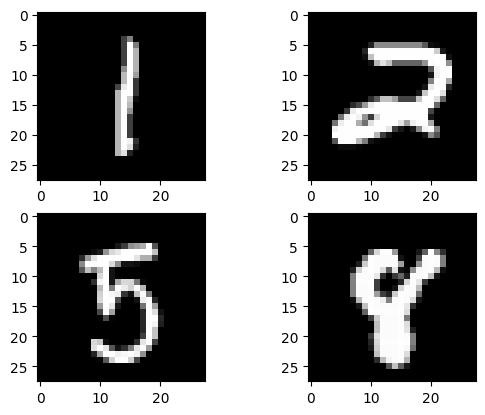

In [4]:
plt.subplot(221)
plt.imshow(X_train[310], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[515], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[1210], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[2150], cmap=plt.get_cmap('gray'))
plt.show()

In [5]:
# let's try a basic neural network for digit classification
model = keras.Sequential()
model.add(layers.Dense(20, activation='sigmoid', input_shape=(784,)))
model.add(layers.Dense(20, activation='sigmoid'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                15700     
                                                                 
 dense_1 (Dense)             (None, 20)                420       
                                                                 
 dense_2 (Dense)             (None, 10)                210       
                                                                 
Total params: 16330 (63.79 KB)
Trainable params: 16330 (63.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [6]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))


Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.0109 - accuracy: 0.7672
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3570 - accuracy: 0.9005
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2681 - accuracy: 0.9228
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2285 - accuracy: 0.9328
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2034 - accuracy: 0.9404
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1862 - accuracy: 0.9452
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1734 - accuracy: 0.9493
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1634 - accuracy: 0.9518
Epoch 9/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1544 - accuracy: 0.9545
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.148

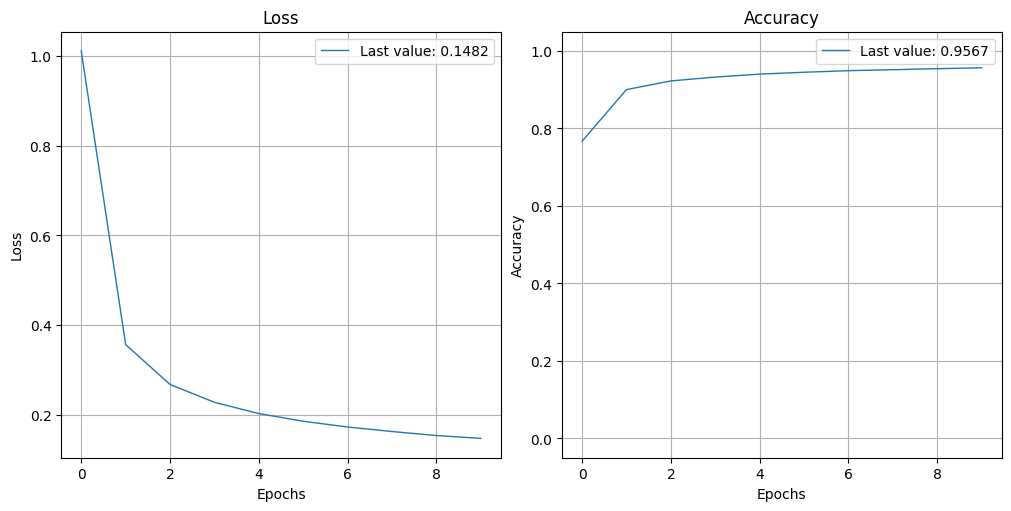

In [7]:
show_history(history)

In [8]:
loss, acc = model.evaluate(x_test, y_test, verbose=2)
print("Test accuracy: {:5.2f}%".format(100*acc))
loss, acc = model.evaluate(x_train, y_train, verbose=2)
print("Train accuracy: {:5.2f}%".format(100*acc))

313/313 - 1s - loss: 0.1690 - accuracy: 0.9506 - 628ms/epoch - 2ms/step
Test accuracy: 95.06%
1875/1875 - 3s - loss: 0.1418 - accuracy: 0.9586 - 3s/epoch - 1ms/step
Train accuracy: 95.86%


In [20]:
import numpy as np

1/1 [==============================] - 0s 35ms/step
Predicted Digit: 3


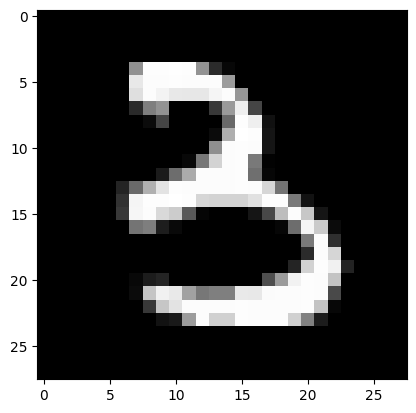

In [26]:
# check if the prediction is working fine for a random test point
test_pt = 782
plt.imshow(X_test[test_pt], cmap=plt.get_cmap('gray'))
probs = model.predict(x_test[test_pt:test_pt+1], verbose=True)
print("Predicted Digit:", np.argmax(probs))

In [27]:
# Let's try with a slightly bigger model with more parameters.
model2 = keras.Sequential()
model2.add(layers.Dense(256, activation='sigmoid', input_shape=(784,)))
model2.add(layers.Dense(128, activation='sigmoid'))
model2.add(layers.Dense(10, activation='softmax'))
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 256)               200960    
                                                                 
 dense_4 (Dense)             (None, 128)               32896     
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 235146 (918.54 KB)
Trainable params: 235146 (918.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [29]:
model2.compile(loss='categorical_crossentropy', metrics=['accuracy'])
history = model2.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0949 - accuracy: 0.9718 - val_loss: 0.0935 - val_accuracy: 0.9713
Epoch 2/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0759 - accuracy: 0.9775 - val_loss: 0.0911 - val_accuracy: 0.9727
Epoch 3/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0616 - accuracy: 0.9806 - val_loss: 0.0824 - val_accuracy: 0.9739
Epoch 4/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0517 - accuracy: 0.9838 - val_loss: 0.0704 - val_accuracy: 0.9782
Epoch 5/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0440 - accuracy: 0.9869 - val_loss: 0.0765 - val_accuracy: 0.9779
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0370 - accuracy: 0.9888 - val_loss: 0.0758 - val_accuracy: 0.9787
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0308 - accuracy: 0.9908 - val_loss: 0.0756 - val_a

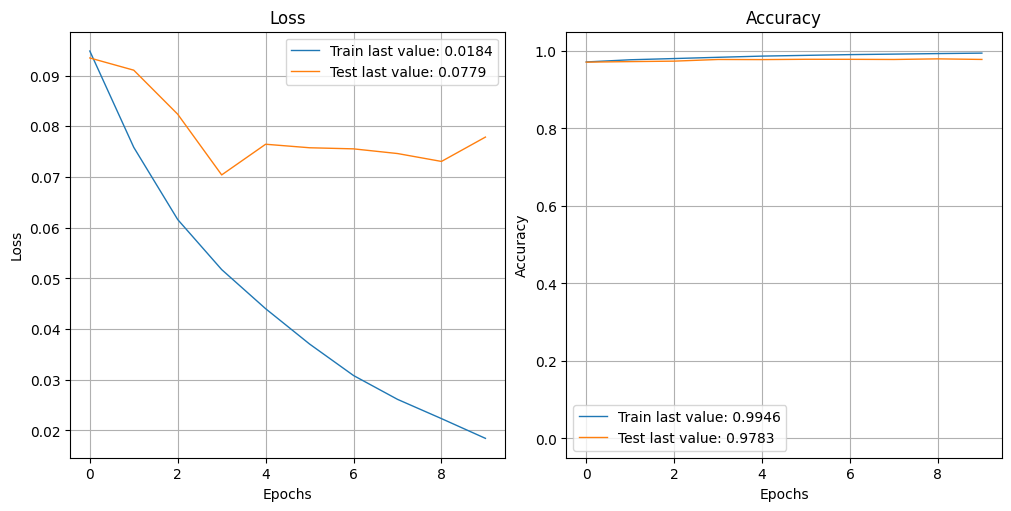

In [30]:
show_history(history)

In [31]:
loss, acc = model2.evaluate(x_test, y_test, verbose=2)
print("Test accuracy: {:5.2f}%".format(100*acc))
loss, acc = model2.evaluate(x_train, y_train, verbose=2)
print("Train accuracy: {:5.2f}%".format(100*acc))

313/313 - 1s - loss: 0.0779 - accuracy: 0.9783 - 1s/epoch - 4ms/step
Test accuracy: 97.83%
1875/1875 - 4s - loss: 0.0135 - accuracy: 0.9960 - 4s/epoch - 2ms/step
Train accuracy: 99.60%


In [39]:
# let's try adding kernel regularization to the mix.
from tensorflow.keras import regularizers
model_r = keras.Sequential()
model_r.add(layers.Dense(256, activation='sigmoid', input_shape=(784,), kernel_regularizer=regularizers.L2(0.01)))
model_r.add(layers.Dense(128, activation='sigmoid', kernel_regularizer=regularizers.L2(0.01)))
model_r.add(layers.Dense(10, activation='softmax'))
model_r.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 256)               200960    
                                                                 
 dense_16 (Dense)            (None, 128)               32896     
                                                                 
 dense_17 (Dense)            (None, 10)                1290      
                                                                 
Total params: 235146 (918.54 KB)
Trainable params: 235146 (918.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [41]:
model_r.compile(loss='categorical_crossentropy', metrics=['accuracy'])
history_r = model_r.fit(x_train, y_train, epochs=50, steps_per_epoch=50, validation_data=(x_test, y_test))

Epoch 1/50
50/50 [==============================] - 4s 64ms/step - loss: 1.3834 - accuracy: 0.7579 - val_loss: 1.3292 - val_accuracy: 0.7909
Epoch 2/50
50/50 [==============================] - 2s 46ms/step - loss: 1.3662 - accuracy: 0.7634 - val_loss: 1.3128 - val_accuracy: 0.7945
Epoch 3/50
50/50 [==============================] - 4s 76ms/step - loss: 1.3487 - accuracy: 0.7688 - val_loss: 1.3355 - val_accuracy: 0.7839
Epoch 4/50
50/50 [==============================] - 3s 57ms/step - loss: 1.3406 - accuracy: 0.7685 - val_loss: 1.3044 - val_accuracy: 0.7667
Epoch 5/50
50/50 [==============================] - 2s 46ms/step - loss: 1.3287 - accuracy: 0.7714 - val_loss: 1.3021 - val_accuracy: 0.7638
Epoch 6/50
50/50 [==============================] - 3s 58ms/step - loss: 1.3227 - accuracy: 0.7684 - val_loss: 1.2942 - val_accuracy: 0.7865
Epoch 7/50
50/50 [==============================] - 3s 56ms/step - loss: 1.3165 - accuracy: 0.7693 - val_loss: 1.3329 - val_accuracy: 0.7529
Epoch 8/50
50

In [42]:
loss, acc = model_r.evaluate(x_test, y_test, verbose=2)
print("Test accuracy: {:5.2f}%".format(100*acc))
loss, acc = model_r.evaluate(x_train, y_train, verbose=2)
print("Train accuracy: {:5.2f}%".format(100*acc))

313/313 - 1s - loss: 1.1330 - accuracy: 0.7870 - 644ms/epoch - 2ms/step
Test accuracy: 78.70%
1875/1875 - 4s - loss: 1.1545 - accuracy: 0.7784 - 4s/epoch - 2ms/step
Train accuracy: 77.84%


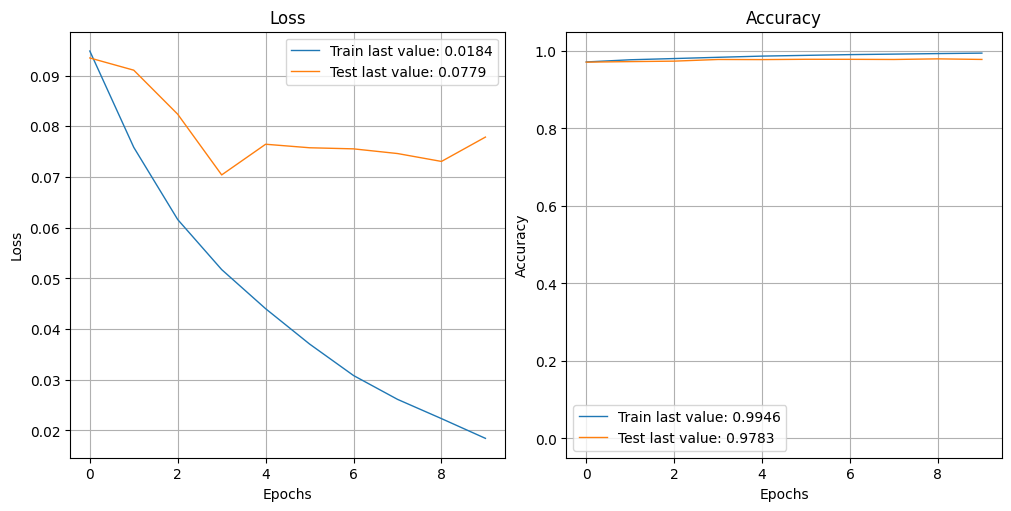

In [43]:
show_history(history_r)

In [44]:
from tensorflow.keras.layers import Dropout

In [45]:
model_rd = keras.Sequential()
model_rd.add(layers.Dense(256, activation='sigmoid', input_shape=(784,)))
model_rd.add(Dropout(0.7))
model_rd.add(layers.Dense(128, activation='sigmoid'))
model_rd.add(Dropout(0.6))
model_rd.add(layers.Dense(10, activation='softmax'))
model_rd.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 256)               200960    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_19 (Dense)            (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_20 (Dense)            (None, 10)                1290      
                                                                 
Total params: 235146 (918.54 KB)
Trainable params: 235146 (918.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [46]:
model_rd.compile(loss='categorical_crossentropy', metrics=['accuracy'])
history_rd = model_rd.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.8542 - accuracy: 0.7215
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4486 - accuracy: 0.8691
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3883 - accuracy: 0.8899
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3501 - accuracy: 0.9024
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3267 - accuracy: 0.9103
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3109 - accuracy: 0.9157
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2951 - accuracy: 0.9208
Epoch 8/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2880 - accuracy: 0.9237
Epoch 9/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.2763 - accuracy: 0.9264
Epoch 10/10
1875/1875 [==============================] - 10s 6ms/step - lo

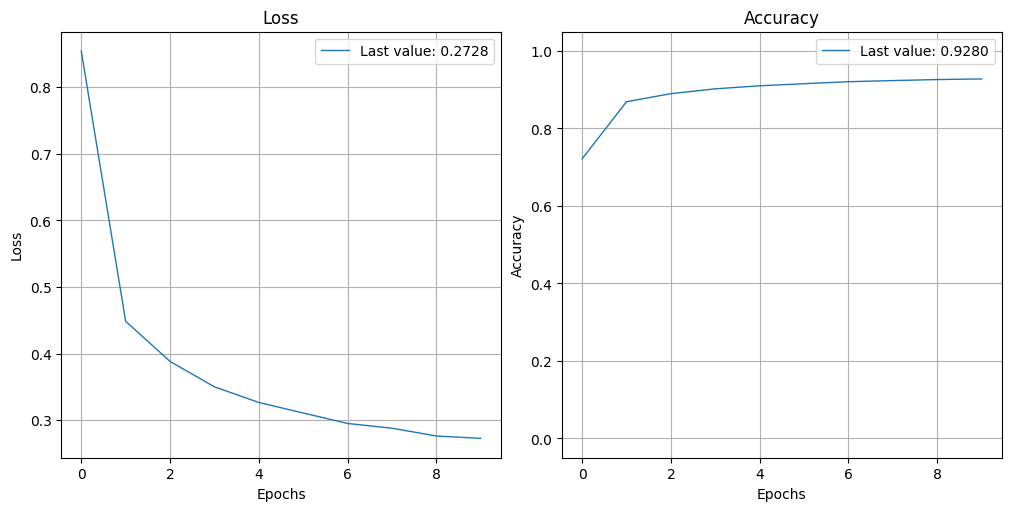

In [47]:
show_history(history_rd)

In [48]:
loss, acc = model_rd.evaluate(x_test, y_test, verbose=2)
print("Test accuracy: {:5.2f}%".format(100*acc))
loss, acc = model_rd.evaluate(x_train, y_train, verbose=2)
print("Train accuracy: {:5.2f}%".format(100*acc))

313/313 - 1s - loss: 0.1548 - accuracy: 0.9569 - 767ms/epoch - 2ms/step
Test accuracy: 95.69%
1875/1875 - 4s - loss: 0.1449 - accuracy: 0.9606 - 4s/epoch - 2ms/step
Train accuracy: 96.06%


In [49]:
# EARLY STOPPING METHOD
model_re = keras.Sequential()
model_re.add(layers.Dense(256, activation='sigmoid', input_shape=(784,)))
model_re.add(layers.Dense(128, activation='sigmoid'))
model_re.add(layers.Dense(10, activation='softmax'))
model_re.summary()
model_re.compile(loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 256)               200960    
                                                                 
 dense_22 (Dense)            (None, 128)               32896     
                                                                 
 dense_23 (Dense)            (None, 10)                1290      
                                                                 
Total params: 235146 (918.54 KB)
Trainable params: 235146 (918.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [50]:
from tensorflow.keras.callbacks import ModelCheckpoint
import h5py

In [51]:
# model will get saved at the end of every epoch automatically.
checkpoint = ModelCheckpoint(r"mnist-epoch-{epoch:02d}.hdf5")
history_es = model_re.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), callbacks=[checkpoint])

Epoch 1/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3995 - accuracy: 0.8874 - val_loss: 0.1976 - val_accuracy: 0.9408
Epoch 2/10
  25/1875 [..............................] - ETA: 8s - loss: 0.2172 - accuracy: 0.9275

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1875/1875 [==============================] - 17s 9ms/step - loss: 0.1711 - accuracy: 0.9480 - val_loss: 0.1398 - val_accuracy: 0.9574
Epoch 3/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1175 - accuracy: 0.9648 - val_loss: 0.1037 - val_accuracy: 0.9682
Epoch 4/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0893 - accuracy: 0.9731 - val_loss: 0.0901 - val_accuracy: 0.9717
Epoch 5/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0713 - accuracy: 0.9786 - val_loss: 0.0820 - val_accuracy: 0.9749
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0594 - accuracy: 0.9820 - val_loss: 0.0728 - val_accuracy: 0.9765
Epoch 7/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0489 - accuracy: 0.9850 - val_loss: 0.0790 - val_accuracy: 0.9763
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0415 - accuracy: 0.9870 - val_loss: 0.0756 - val_accuracy: 0.97

In [ ]:
show_history(history_es)

In [ ]:
es = keras.callbacks.EarlyStopping(monitor='val_accuracy', min_delta=0.01, patience=2)
model_re.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), callbacks=[es])

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0290 - accuracy: 0.9914 - val_loss: 0.1013 - val_accuracy: 0.9751
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0246 - accuracy: 0.9931 - val_loss: 0.1038 - val_accuracy: 0.9756
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0221 - accuracy: 0.9936 - val_loss: 0.1121 - val_accuracy: 0.9745


In [ ]:
# Using LEarning rates now.
model3 = keras.Sequential()
model3.add(layers.Dense(20, activation='sigmoid', input_shape=(784,)))
model3.add(layers.Dense(10, activation='sigmoid'))
model3.add(layers.Dense(10, activation='softmax'))
model3.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 20)                15700     
                                                                 
 dense_25 (Dense)            (None, 10)                210       
                                                                 
 dense_26 (Dense)            (None, 10)                110       
                                                                 
Total params: 16,020
Trainable params: 16,020
Non-trainable params: 0
_________________________________________________________________


In [ ]:
opt_new = keras.optimizers.SGD(learning_rate=10)
model3.compile(optimizer=opt_new, loss='categorical_crossentropy', metrics=['accuracy'])
model3.fit(x_train, y_train, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 5s 2ms/step - loss: 1.4196 - accuracy: 0.5569
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.9477 - accuracy: 0.7383
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7737 - accuracy: 0.7938
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6970 - accuracy: 0.8140
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5912 - accuracy: 0.8511
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6390 - accuracy: 0.8315
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6072 - accuracy: 0.8466
Epoch 8/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5954 - accuracy: 0.8441
Epoch 9/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6514 - accuracy: 0.8235
Epoch 10/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.639

In [ ]:
# too low learning rate
model3 = keras.Sequential()
model3.add(layers.Dense(20, activation='sigmoid', input_shape=(784,)))
model3.add(layers.Dense(10, activation='sigmoid'))
model3.add(layers.Dense(10, activation='softmax'))
model3.summary()
opt_new = keras.optimizers.SGD(learning_rate=.00001)
model3.compile(optimizer=opt_new, loss='categorical_crossentropy', metrics=['accuracy'])
model3.fit(x_train, y_train, epochs=20)

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 20)                15700     
                                                                 
 dense_28 (Dense)            (None, 10)                210       
                                                                 
 dense_29 (Dense)            (None, 10)                110       
                                                                 
Total params: 16,020
Trainable params: 16,020
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 2.4651 - accuracy: 0.1124
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 2.4618 - accuracy: 0.1123
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 2.4586 - accuracy: 0.1123
Epoch 4

In [ ]:
# optimal learning rate
model3 = keras.Sequential()
model3.add(layers.Dense(20, activation='sigmoid', input_shape=(784,)))
model3.add(layers.Dense(10, activation='sigmoid'))
model3.add(layers.Dense(10, activation='softmax'))
model3.summary()
opt_new = keras.optimizers.SGD(learning_rate=.01)
model3.compile(optimizer=opt_new, loss='categorical_crossentropy', metrics=['accuracy'])
model3.fit(x_train, y_train, epochs=20)

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 20)                15700     
                                                                 
 dense_31 (Dense)            (None, 10)                210       
                                                                 
 dense_32 (Dense)            (None, 10)                110       
                                                                 
Total params: 16,020
Trainable params: 16,020
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 2.2533 - accuracy: 0.2392
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 2.0421 - accuracy: 0.4538
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 1.7108 - accuracy: 0.5248
Epoch 4

In [ ]:
# optimal learning rate with momentum
model3 = keras.Sequential()
model3.add(layers.Dense(20, activation='sigmoid', input_shape=(784,)))
model3.add(layers.Dense(10, activation='sigmoid'))
model3.add(layers.Dense(10, activation='softmax'))
model3.summary()
opt_new = keras.optimizers.SGD(learning_rate=.01, momentum=0.5)
model3.compile(optimizer=opt_new, loss='categorical_crossentropy', metrics=['accuracy'])
model3.fit(x_train, y_train, epochs=20)

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 20)                15700     
                                                                 
 dense_37 (Dense)            (None, 10)                210       
                                                                 
 dense_38 (Dense)            (None, 10)                110       
                                                                 
Total params: 16,020
Trainable params: 16,020
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
1875/1875 [==============================] - 5s 2ms/step - loss: 2.1416 - accuracy: 0.3215
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5759 - accuracy: 0.5187
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 1.1739 - accuracy: 0.6662
Epoch 4

In [ ]:
# Mini-batch SGD
# the default minibatch size is 32 unlike 1.
model4 = keras.Sequential()
model4.add(layers.Dense(20, activation='sigmoid', input_shape=(784,)))
model4.add(layers.Dense(10, activation='sigmoid'))
model4.add(layers.Dense(10, activation='softmax'))
model4.summary()
opt_new = keras.optimizers.SGD(learning_rate=.01, momentum=0.5)
model4.compile(loss='categorical_crossentropy', metrics=['accuracy'])
model4.fit(x_train, y_train, batch_size=512, epochs=10)

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_60 (Dense)            (None, 20)                15700     
                                                                 
 dense_61 (Dense)            (None, 10)                210       
                                                                 
 dense_62 (Dense)            (None, 10)                110       
                                                                 
Total params: 16,020
Trainable params: 16,020
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
118/118 [==============================] - 1s 4ms/step - loss: 2.1100 - accuracy: 0.3083
Epoch 2/10
118/118 [==============================] - 0s 4ms/step - loss: 1.7772 - accuracy: 0.5403
Epoch 3/10
118/118 [==============================] - 0s 4ms/step - loss: 1.5238 - accuracy: 0.5899
Epoch 4/10
11